In [1]:
%matplotlib inline

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
#from config import api_key

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


shingu jp
ushuaia ar
mataura pf
constitucion mx
nikolskoye ru
taolanaro mg
illoqqortoormiut gl
longyearbyen sj
albany au
hermanus za
healesville au
hecun cn
tongliao cn
yaan cn
khatanga ru
kapaa us
mataura pf
atuona pf
ardakan ir
butaritari ki
chokurdakh ru
barentsburg sj
kapaa us
batagay-alyta ru
busselton au
izhmorskiy ru
komsomolskiy ru
cape town za
kununurra au
lerwick gb
fare pf
nikolskoye ru
mataura pf
moron mn
sawtell au
tasiilaq gl
vaini to
upernavik gl
cabo san lucas mx
voi ke
illoqqortoormiut gl
pangody ru
paamiut gl
ushuaia ar
albany au
punta arenas cl
ingham au
ribeira grande pt
chernyshevskiy ru
bubaque gw
manthani in
codrington ag
new norfolk au
ucluelet ca
barentsburg sj
ushuaia ar
samusu ws
mataura pf
bluff nz
kijang id
attawapiskat ca
prince rupert ca
yumen cn
hobart au
atuona pf
arraial do cabo br
nikolskoye ru
bata gq
tsihombe mg
bluff nz
taolanaro mg
rikitea pf
rikitea pf
cabedelo br
constantine dz
port elizabeth za
albany au
bambous virieux mu
ushuaia ar
vila franc

severo-kurilsk ru
boulder city us
jalu ly
dongsheng cn
hithadhoo mv
ushuaia ar
jawad in
beringovskiy ru
clyde river ca
busselton au
kapaa us
vaini to
astoria us
eskasem af
grindavik is
osoyoos ca
port hardy ca
ribeira grande pt
touros br
karaul ru
mataura pf
cherskiy ru
laguna br
rikitea pf
mahebourg mu
busselton au
cape town za
albany au
kavaratti in
chokurdakh ru
rikitea pf
namibe ao
ahipara nz
kodiak us
hermanus za
saldanha za
punta arenas cl
kavaratti in
taolanaro mg
grand centre ca
capanema br
hasaki jp
souillac mu
abilene us
zhangye cn
svetlaya ru
barao de melgaco br
shubarshi kz
fairbanks us
sabha ly
victoria sc
albany au
touros br
punta arenas cl
vaini to
massakory td
rikitea pf
ilulissat gl
caravelas br
san antonio cl
henties bay na
olinda br
coquimbo cl
busselton au
roald no
tandil ar
avarua ck
ilinsko-podomskoye ru
chokurdakh ru
provideniya ru
college us
mataura pf
acapulco mx
yining cn
bambanglipuro id
darhan mn
hobart au
mataura pf
codrington ag
hermanus za
leo bf
rikitea 

chuy uy
yellowknife ca


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [9]:
# API: Application Programming Interface

In [10]:
import requests
requests.__version__

'2.27.1'

In [11]:
# Make a Request for Data to an API

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [23]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Handle API Request Errors with try-except Blocks
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 22 of Set 25 | shingu
Processing Record 23 of Set 25 | ushuaia
Processing Record 24 of Set 25 | mataura
Processing Record 25 of Set 25 | constitucion
Processing Record 26 of Set 25 | nikolskoye
Processing Record 27 of Set 25 | taolanaro
City not found. Skipping...
Processing Record 28 of Set 25 | illoqqortoormiut
City not found. Skipping...
Processing Record 29 of Set 25 | longyearbyen
Processing Record 30 of Set 25 | albany
Processing Record 31 of Set 25 | hermanus
Processing Record 32 of Set 25 | healesville
Processing Record 33 of Set 25 | hecun
Processing Record 34 of Set 25 | tongliao
Processing Record 35 of Set 25 | yaan
Processing Record 36 of Set 25 | khatanga
Processing Record 37 of Set 25 | kapaa
Processing Record 38 of Set 25 | atuona
Processing Record 39 of Set 25 | ardakan
Processing Record 40 of Set 25 | butaritari
Processing Record 41 of Set 25 | chokurdakh
Processing Record 42 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 43 of 

Processing Record 33 of Set 28 | grand gaube
Processing Record 34 of Set 28 | ilulissat
Processing Record 35 of Set 28 | elmadag
Processing Record 36 of Set 28 | rawannawi
City not found. Skipping...
Processing Record 37 of Set 28 | dikson
Processing Record 38 of Set 28 | portland
Processing Record 39 of Set 28 | homer
Processing Record 40 of Set 28 | saint-augustin
Processing Record 41 of Set 28 | kahului
Processing Record 42 of Set 28 | jacareacanga
Processing Record 43 of Set 28 | faanui
Processing Record 44 of Set 28 | college
Processing Record 45 of Set 28 | owensboro
Processing Record 46 of Set 28 | dunedin
Processing Record 47 of Set 28 | beckley
Processing Record 48 of Set 28 | esperance
Processing Record 49 of Set 28 | la maddalena
Processing Record 50 of Set 28 | mandalgovi
Processing Record 1 of Set 29 | torbay
Processing Record 2 of Set 29 | chardara
Processing Record 3 of Set 29 | nador
Processing Record 4 of Set 29 | zgorzelec
Processing Record 5 of Set 29 | srednekolymsk

Processing Record 16 of Set 32 | ijaki
City not found. Skipping...
Processing Record 17 of Set 32 | caravelas
Processing Record 18 of Set 32 | nizwa
Processing Record 19 of Set 32 | kroya
Processing Record 20 of Set 32 | kupino
Processing Record 21 of Set 32 | atar
Processing Record 22 of Set 32 | saint george
Processing Record 23 of Set 32 | aojiang
Processing Record 24 of Set 32 | akyab
Processing Record 25 of Set 32 | kavieng
Processing Record 26 of Set 32 | kloulklubed
Processing Record 27 of Set 32 | los llanos de aridane
Processing Record 28 of Set 32 | misratah
Processing Record 29 of Set 32 | abu samrah
Processing Record 30 of Set 32 | serpa
Processing Record 31 of Set 32 | pangnirtung
Processing Record 32 of Set 32 | boulder city
Processing Record 33 of Set 32 | jalu
Processing Record 34 of Set 32 | dongsheng
Processing Record 35 of Set 32 | jawad
Processing Record 36 of Set 32 | astoria
Processing Record 37 of Set 32 | eskasem
City not found. Skipping...
Processing Record 38 

City not found. Skipping...
Processing Record 1 of Set 36 | bafia
Processing Record 2 of Set 36 | safford
Processing Record 3 of Set 36 | tadine
Processing Record 4 of Set 36 | ippy
Processing Record 5 of Set 36 | umm kaddadah
Processing Record 6 of Set 36 | sarkand
Processing Record 7 of Set 36 | loikaw
Processing Record 8 of Set 36 | tomatlan
Processing Record 9 of Set 36 | praia
Processing Record 10 of Set 36 | morgan city
Processing Record 11 of Set 36 | copiapo
Processing Record 12 of Set 36 | nishihara
Processing Record 13 of Set 36 | horasan
Processing Record 14 of Set 36 | flin flon
Processing Record 15 of Set 36 | kutum
Processing Record 16 of Set 36 | arcata
Processing Record 17 of Set 36 | freeport
Processing Record 18 of Set 36 | luklukan
Processing Record 19 of Set 36 | bonthe
Processing Record 20 of Set 36 | uusikaupunki
Processing Record 21 of Set 36 | obihiro
Processing Record 22 of Set 36 | katangli
Processing Record 23 of Set 36 | kenai
Processing Record 24 of Set 36 

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Three Hills,51.7001,-113.2686,43.29,42,100,16.11,CA,2022-02-13 19:30:28
1,Shingu,33.7333,135.9833,45.91,87,100,4.81,JP,2022-02-13 19:36:36
2,Ushuaia,-54.8000,-68.3000,40.66,81,100,26.46,AR,2022-02-13 19:36:36
3,Mataura,-46.1927,168.8643,46.47,97,27,2.95,NZ,2022-02-13 19:36:37
4,Constitucion,-35.3333,-72.4167,67.98,70,53,9.31,CL,2022-02-13 19:36:38
5,Nikolskoye,59.7035,30.7861,33.87,89,100,12.95,RU,2022-02-13 19:36:39
6,Longyearbyen,78.2186,15.6401,13.84,92,75,2.30,SJ,2022-02-13 19:36:40
7,Albany,42.6001,-73.9662,26.17,54,100,3.00,US,2022-02-13 19:34:48
8,Hermanus,-34.4187,19.2345,72.90,83,26,16.22,ZA,2022-02-13 19:36:41
9,Healesville,-37.6500,145.5167,66.31,65,36,3.18,AU,2022-02-13 19:35:39


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Three Hills,CA,2022-02-13 19:30:28,51.7001,-113.2686,43.29,42,100,16.11
1,Shingu,JP,2022-02-13 19:36:36,33.7333,135.9833,45.91,87,100,4.81
2,Ushuaia,AR,2022-02-13 19:36:36,-54.8000,-68.3000,40.66,81,100,26.46
3,Mataura,NZ,2022-02-13 19:36:37,-46.1927,168.8643,46.47,97,27,2.95
4,Constitucion,CL,2022-02-13 19:36:38,-35.3333,-72.4167,67.98,70,53,9.31
5,Nikolskoye,RU,2022-02-13 19:36:39,59.7035,30.7861,33.87,89,100,12.95
6,Longyearbyen,SJ,2022-02-13 19:36:40,78.2186,15.6401,13.84,92,75,2.30
7,Albany,US,2022-02-13 19:34:48,42.6001,-73.9662,26.17,54,100,3.00
8,Hermanus,ZA,2022-02-13 19:36:41,-34.4187,19.2345,72.90,83,26,16.22
9,Healesville,AU,2022-02-13 19:35:39,-37.6500,145.5167,66.31,65,36,3.18


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Plot Latitude vs. Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

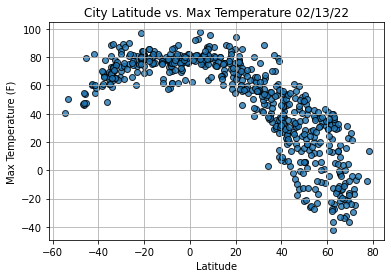

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

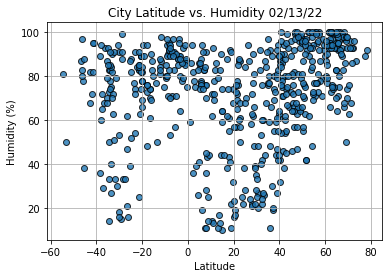

In [31]:
# Plot Latitude vs. Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

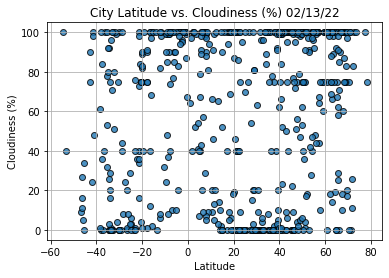

In [32]:
# Plot Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

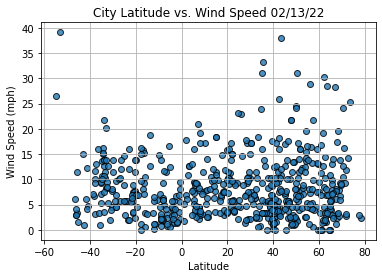

In [33]:
# Plot Latitude vs. Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()